In [2]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')
# Просмотр первых строк датасета
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


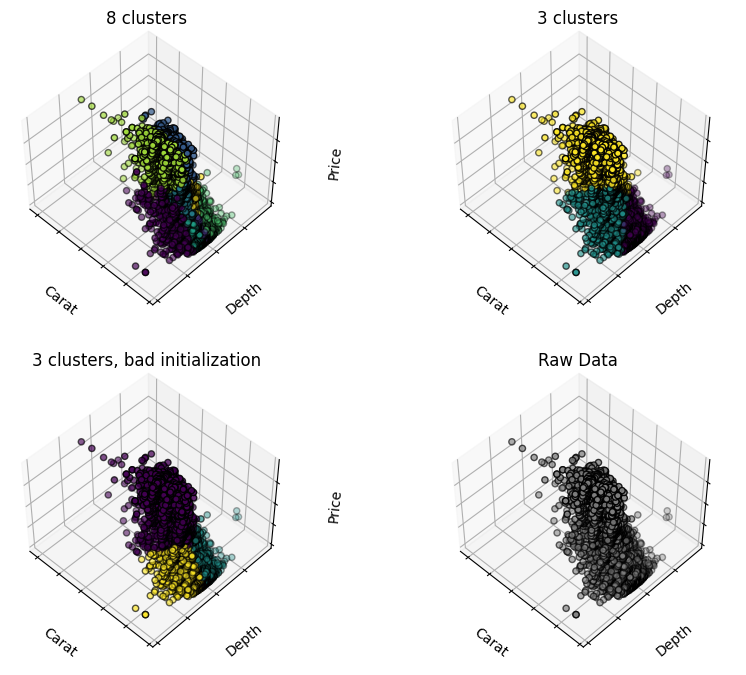

In [5]:
# Выберем три числовых признака для визуализации
X = df[["carat", "depth", "price"]]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модели для разных вариантов кластеризации
estimators = [
    ("k_means_diamonds_8", KMeans(n_clusters=8)),
    ("k_means_diamonds_3", KMeans(n_clusters=3)),
    ("k_means_diamonds_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

# Построение графиков для каждой модели
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X_scaled)
    labels = est.labels_

    # Отображение кластеров в 3D
    ax.scatter(X["carat"], X["depth"], X["price"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Carat")
    ax.set_ylabel("Depth")
    ax.set_zlabel("Price")
    ax.set_title(title)

# Финальный график (например, для сравнения с "истинной" классификацией, если она есть)
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# Если нет "Ground Truth", то просто отобразим данные без кластеров
ax.scatter(X["carat"], X["depth"], X["price"], c='gray', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Carat")
ax.set_ylabel("Depth")
ax.set_zlabel("Price")
ax.set_title("Raw Data")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

    8 clusters (8 кластеров):
        Этот график показывает результат кластеризации с 8 кластерами. Мы видим 8 разных групп точек, каждая из которых окрашена в свой цвет. Слишком большое количество кластеров приводит к тому, что данные разбиваются на множество мелких групп, некоторые из которых могут быть близко расположены друг к другу. Это может свидетельствовать о том, что 8 кластеров — избыточное количество для данной задачи.

    3 clusters (3 кластера):
        В этом случае данные разбиты на три группы. Это может быть более адекватным количеством кластеров для описания данных. На графике видно, что одна группа (желтая) состоит из объектов с более высокой ценой и большим весом каратов, тогда как две другие группы (зеленая и фиолетовая) отличаются по значениям глубины и цены.

    3 clusters, bad initialization (3 кластера, плохая инициализация):
        Здесь использовалась та же кластеризация с 3 кластерами, но с плохой начальной инициализацией. В результате некоторые группы могут оказаться неправильно сформированными. Это демонстрирует важность правильной инициализации центроидов в K-Means — начальные условия могут сильно влиять на результаты.

    Raw Data (Исходные данные):
        Этот график показывает исходные данные без применения кластеризации. Все точки отображены серым цветом, чтобы визуализировать распределение данных без разделения на группы.

Выводы:

    Количество кластеров: 8 кластеров разбивает данные слишком детализированно, а 3 кластера представляют более логичное разделение, возможно, соответствующее ключевым различиям в признаках (например, разные категории бриллиантов по цене, размеру и глубине).
    Влияние инициализации: Кластеризация с плохой инициализацией приводит к менее точным результатам, что может ухудшить интерпретацию данных.
    Распределение данных: Исходные данные показывают, что объекты (бриллианты) имеют некоторое распределение в пространстве признаков, и кластеризация может быть полезна для понимания их группировки.



Лучшее количество кластеров: 19
Координаты центров кластеров: [[-1.07313162  0.49509467  0.8063176   0.32631415  0.25718173  0.60079641
   0.58306567  0.69235489]
 [ 0.55634666 -0.94285971 -0.520536   -0.33406697 -0.76913521 -1.05415269
  -1.02865534 -1.07993016]
 [ 1.21424112 -0.41545173 -2.11593987  1.98051988 -0.54566425 -0.21280032
  -0.22278428 -0.44972435]
 [-0.8136361   0.67596463 -0.77915087  0.28869149  0.57880137  0.86959147
   0.84659692  0.74473876]
 [-0.06679051  2.75910159  0.38452121  0.05594688  2.85004091  2.17376067
   2.15294094  2.21161554]
 [ 0.5089497  -0.95461578  0.34912595 -1.10427371 -0.78352968 -1.10345008
  -1.07628004 -1.04599022]
 [-1.50989151 -0.05719205  0.01601812 -0.4918801  -0.13146692  0.12597518
   0.1346573   0.13160086]
 [ 1.30454318 -0.33170143  1.26128803  0.03310611 -0.5091426  -0.25957853
  -0.26439015 -0.11773321]
 [-1.20785001  0.37694587  0.11229741  1.6443208   0.12786036  0.51045034
   0.49023133  0.5068807 ]
 [-0.30092752  1.49599033  0.

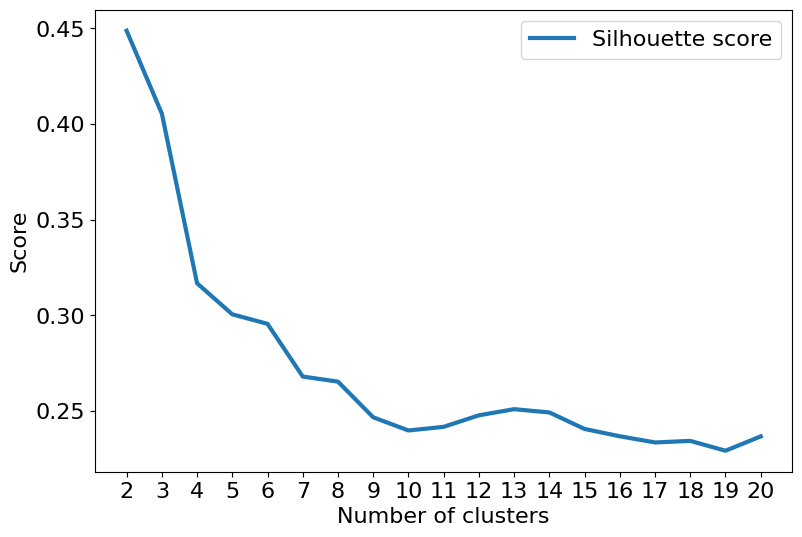

In [8]:
# Выбор числовых признаков для кластеризации
numeric_features = df.select_dtypes(include=[np.number]).dropna()

# Масштабирование признаков
scaler = StandardScaler()
X = scaler.fit_transform(numeric_features)

# Перебор количества кластеров от 2 до 20
n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0, []]

silhouette_score_values = []
adjusted_rand_score_values = []

# Параметры для кластеризации
for n in n_clusters:
    clusterer = KMeans(n_clusters=n, max_iter=300, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    # Silhouette score
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Adjusted Rand score (без истинных меток классов будет None, пропускаем это)
    # Предполагается, что унет меток 'y' для сравнения
    # score2 = metrics.adjusted_rand_score(y, y_pred)
    # adjusted_rand_score_values.append(score2)

    if score1 < best_metric[1]:
        best_metric[1] = score1
        best_metric[0] = n
        best_metric[3] = clusterer.cluster_centers_

# Вывод лучшего количества кластеров
print(f"Лучшее количество кластеров: {best_metric[0]}")
print(f"Координаты центров кластеров: {best_metric[3]}")

# Визуализация метрик
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Лучшее количество кластеров: 0
Лучший Silhouette Score: 10000
Лучший Davies-Bouldin Index: 0


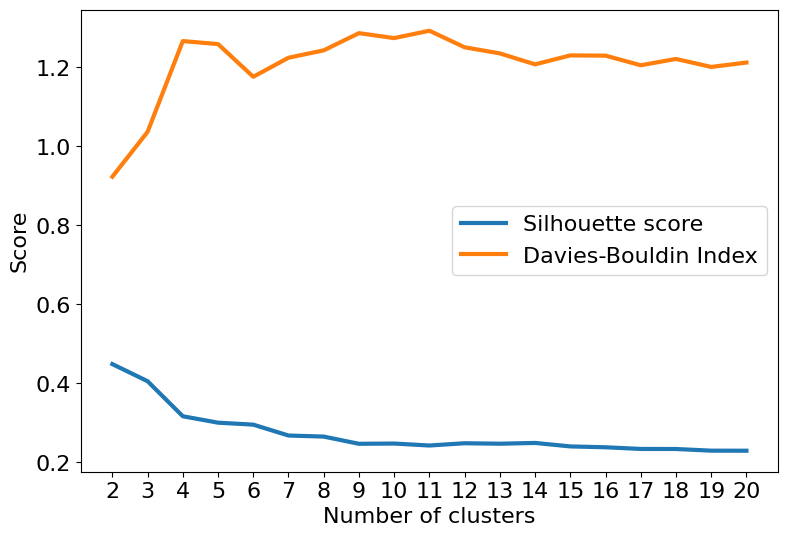

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Диапазон количества кластеров для оценки
n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0, []]

silhouette_score_values = []
davies_bouldin_score_values = []

# Проходим по разным количествам кластеров
for n in n_clusters:
    clusterer = KMeans(n_clusters=n, max_iter=300, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    # Silhouette Score
    silhouette_score = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(silhouette_score)

    # Davies-Bouldin Index
    davies_bouldin_score = metrics.davies_bouldin_score(X, y_pred)
    davies_bouldin_score_values.append(davies_bouldin_score)

    # Сравниваем для поиска лучших параметров
    if silhouette_score < best_metric[1] and davies_bouldin_score < best_metric[2]:
        best_metric[1] = silhouette_score
        best_metric[2] = davies_bouldin_score
        best_metric[3] = clusterer.cluster_centers_
        best_metric[0] = n

# Печатаем лучшие метрики
print(f"Лучшее количество кластеров: {best_metric[0]}")
print(f"Лучший Silhouette Score: {best_metric[1]}")
print(f"Лучший Davies-Bouldin Index: {best_metric[2]}")

# Визуализация метрик
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, label='Silhouette score', linewidth=3)
plt.plot(n_clusters, davies_bouldin_score_values, label='Davies-Bouldin Index', linewidth=3)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.show()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


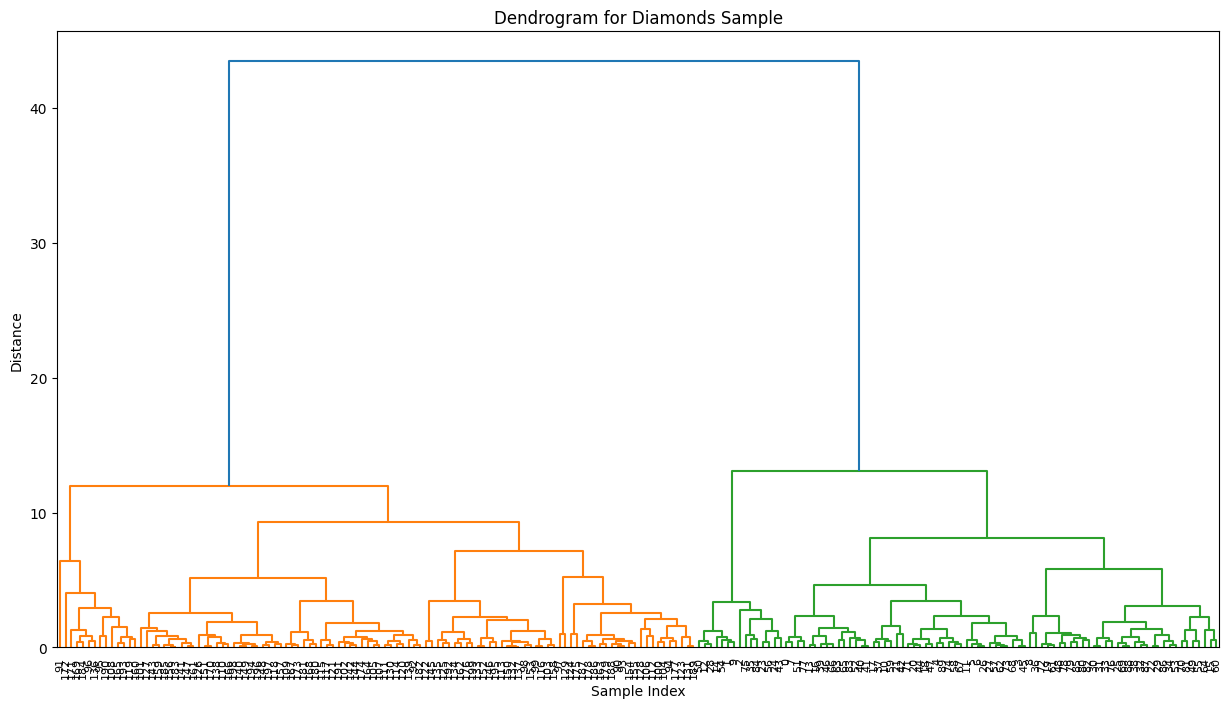

In [5]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Подключение Google Диска
drive.mount('/content/drive/')

# Загрузка датасета diamonds из Google Диска
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

# Выбираем числовые столбцы для кластеризации
# Ограничим выборку 200 строками, чтобы избежать проблем с памятью
sample_df = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].head(200)

# Масштабируем данные перед кластеризацией
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(sample_df)

# Реализация иерархической кластеризации
mergings = linkage(scaled_samples, method='ward')

# Построение дендрограммы
plt.figure(figsize=(15, 8))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Dendrogram for Diamonds Sample')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


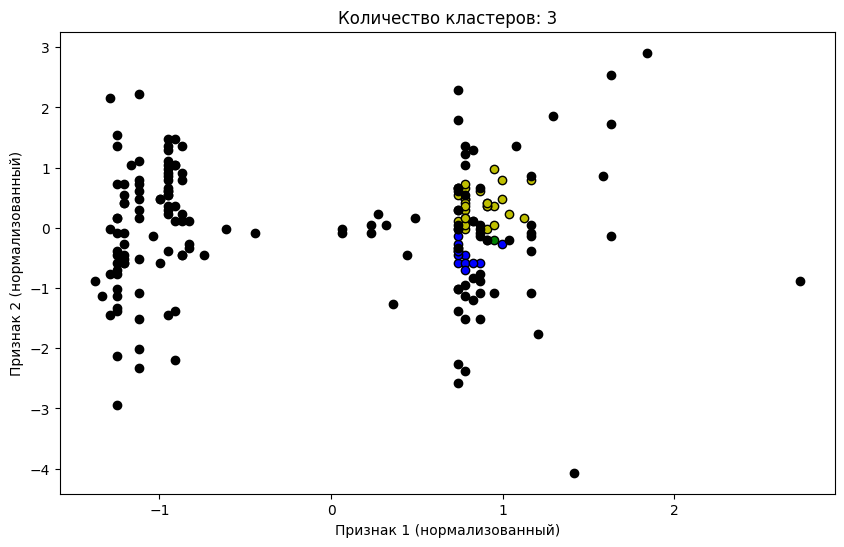

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Подключение Google Диска
drive.mount('/content/drive/')

# Загрузка датасета diamonds из Google Диска
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

# Выбор числовых столбцов для кластеризации
# Ограничим выборку 200 строками, чтобы избежать проблем с памятью
sample_df = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].head(200)

# Масштабируем данные перед кластеризацией
scaler = StandardScaler()
X = scaler.fit_transform(sample_df)

# Применение DBSCAN
db = DBSCAN(eps=0.5, min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Число кластеров в метках, игнорируя шум
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Визуализация результатов
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']
color_map = {k: colors[i % len(colors)] for i, k in enumerate(unique_labels)}

plt.figure(figsize=(10, 6))
for k in unique_labels:
    col = color_map[k] if k != -1 else 'k'  # Черный для шума

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Количество кластеров: {n_clusters_}')
plt.xlabel('Признак 1 (нормализованный)')
plt.ylabel('Признак 2 (нормализованный)')
plt.show()


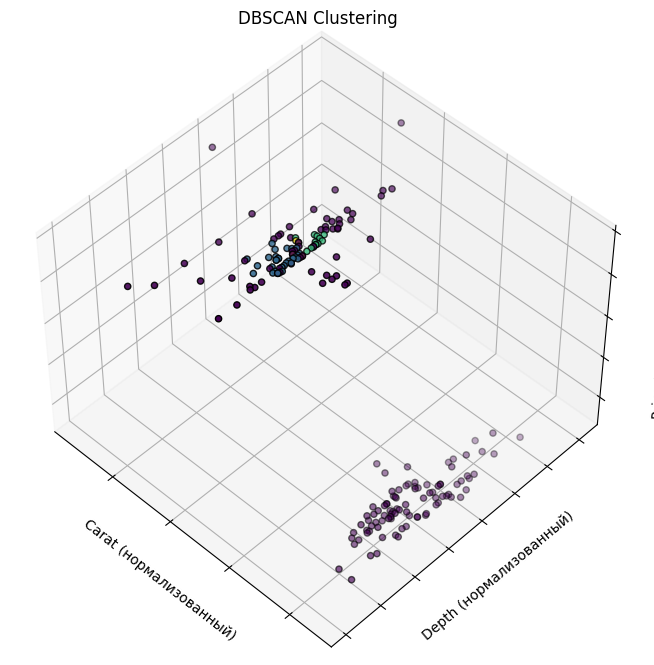

In [9]:
# 3D визуализация
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

# Используем carat, depth и price для осей
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Carat (нормализованный)")
ax.set_ylabel("Depth (нормализованный)")
ax.set_zlabel("Price (нормализованный)")
ax.set_title("DBSCAN Clustering")

plt.show()

In [13]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.2f" % sc)

# Если у вас есть истинные метки классов y, используйте Adjusted Rand Index
try:
    ari = adjusted_rand_score(y, labels)
    print("Adjusted Rand Index: %0.2f" % ari)
except NameError:
    print("Истинные метки классов (y) отсутствуют. Пропуск вычислений Adjusted Rand Index.")


Silhouette Coefficient: -0.04
Истинные метки классов (y) отсутствуют. Пропуск вычислений Adjusted Rand Index.


    Silhouette Coefficient варьируется от -1 до 1. Значение близкое к -1 указывает на то, что данные имеют сложную структуру.